In [18]:
####실제로 ARIMA 구현해보기####

#앞서 구한 ACF 그래프와 PACF 그래프를 참고하여 p,q값이 1이라 구했고 차분은 1번만 해도 괜찮다는 것을 보았다.
#하지만 실제로 모형을 돌려본 결과 유의확률 이상의 값이 나와서 (2,1,2)를 선택하게 되었다.
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(dflg2.price.values, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  729
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5469.214
Date:                Sun, 01 Jan 2023   AIC                          10948.428
Time:                        23:13:07   BIC                          10971.380
Sample:                             0   HQIC                         10957.284
                                - 729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5802      0.021    -75.911      0.000      -1.621      -1.539
ar.L2         -0.9850      0.020    -48.634      0.000      -1.025      -0.945
ma.L1          1.5673      0.029     53.738      0.0

<AxesSubplot:>

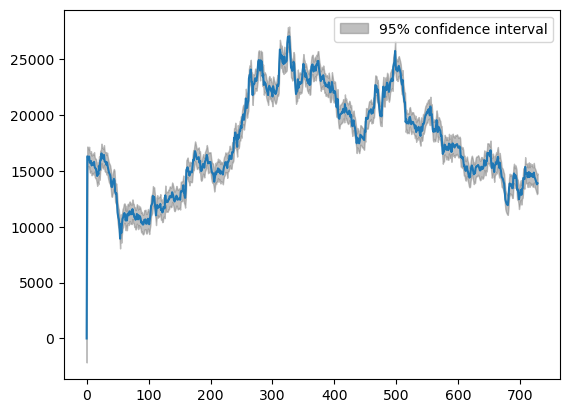

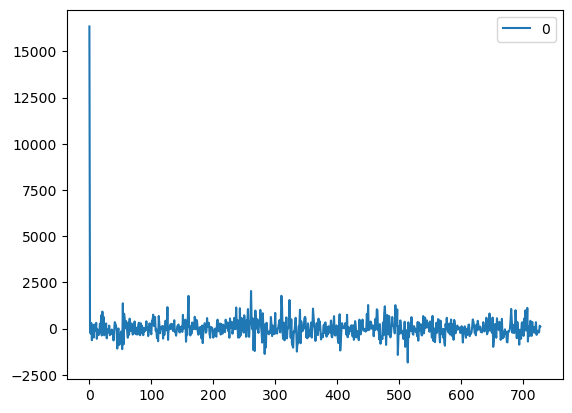

In [19]:
#이러한 모델에 데이터를 넣었을 때  95%신뢰구간으로 예측한 것을 그림으로 나타내면 다음과 같다.
#꽤나 정확히 예측한것으로 보인다.
flg = plot_predict(model_fit)
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

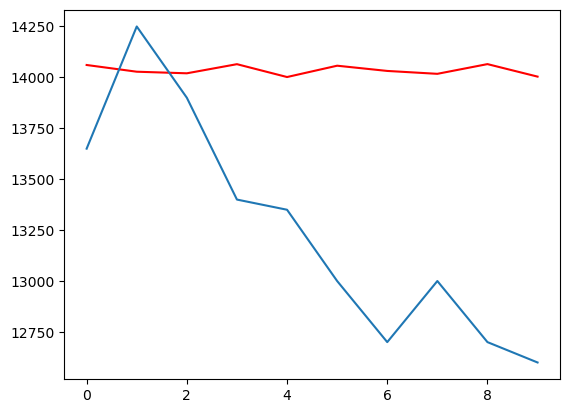

In [20]:
#이번에는 만든 모형으로 미래의 값을 예측하고 실제의 값과 어떤 차이가 있는지를 보았다.
yy = dflg_p['price'].values
fore = model_fit.forecast(steps=10)
flg
plt.plot(fore,color='r')
plt.plot(yy)

In [ ]:
#예측과는 많이 다른 결과가 나왔다. 처음하는 분석이라 실수가 있었을 수도 있고 
#주식자체가 불안정하고 외부 요인에 영향도 많이 받기때문일 수도 있다고 생각한다.
#다음에는 더 좋은 모형을 만들기를 바라며 이번 모형 실습을 마치겠다.